In [16]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root_dir = r'D:\cw_odmr_data\20230904_cw_odmr_SiC_bulk_V1_ensemble_RF100to300MHz_step1MHz_tempRT_pump730nm_freqSweep50ms'
data_list = os.listdir(root_dir)
data_list

['Dev0_T3_2023_09_05_19_41_08_s0.txt',
 'Dev0_T3_2023_09_05_19_42_37_s0.txt',
 'Dev0_T3_2023_09_05_19_43_09_s0.txt',
 'Dev0_T3_2023_09_05_19_44_25_s0.txt',
 'Dev0_T3_2023_09_05_19_44_57_s0.txt',
 'Dev0_T3_2023_09_05_19_45_27_s0.txt',
 'Dev0_T3_2023_09_05_19_45_57_s0.txt',
 'Dev0_T3_2023_09_05_19_46_26_s0.txt',
 'Dev0_T3_2023_09_05_19_46_55_s0.txt',
 'Dev0_T3_2023_09_05_19_47_22_s0.txt',
 'Dev0_T3_2023_09_05_19_47_50_s0.txt',
 'Dev0_T3_2023_09_05_19_48_17_s0.txt',
 'Dev0_T3_2023_09_05_19_49_00_s0.txt',
 'Dev0_T3_2023_09_05_19_50_02_s0.txt',
 'Dev0_T3_2023_09_05_19_50_34_s0.txt',
 'Dev0_T3_2023_09_05_19_51_08_s0.txt',
 'Dev0_T3_2023_09_05_19_52_01_s0.txt',
 'Dev0_T3_2023_09_05_19_52_34_s0.txt',
 'Dev0_T3_2023_09_05_19_53_20_s0.txt',
 'Dev0_T3_2023_09_05_19_53_51_s0.txt',
 'Dev0_T3_2023_09_05_19_57_39_s0.txt',
 'Dev0_T3_2023_09_05_19_58_18_s0.txt',
 'Dev0_T3_2023_09_05_19_58_48_s0.txt',
 'Dev0_T3_2023_09_05_19_59_16_s0.txt',
 'Dev0_T3_2023_09_05_19_59_45_s0.txt',
 'Dev0_T3_2023_09_05_20_0

In [19]:
x = range(100,301,1)
y_tot = np.array([0]*201)
for item in data_list:
    y=[]
    data_path = os.path.join(root_dir, item)
    cw_odmr_result = pd.read_table(data_path, skiprows=10, header=0)
    intensity_result = cw_odmr_result['Sync']
    v_counts = intensity_result.value_counts(sort=False)
    v_counts_df = v_counts.to_frame()
    v_counts_df.rename(columns={'Sync':'Counts'}, inplace=True)
    for i in range(0,201):
        start = i*1000+1
        stop = (i+1)*1000
        y.append(v_counts_df.loc[start:stop, 'Counts'].sum())
    y = np.array(y)
    y_tot += y
y_tot

array([1324802, 1325363, 1325504, 1325853, 1324728, 1324355, 1324721,
       1323239, 1326051, 1326256, 1325089, 1327122, 1325299, 1325435,
       1326027, 1323902, 1325303, 1324391, 1325210, 1325303, 1323919,
       1323931, 1324175, 1324804, 1324649, 1323927, 1326347, 1323787,
       1326273, 1324491, 1325074, 1325217, 1325020, 1323273, 1326830,
       1325852, 1325942, 1324409, 1324928, 1324363, 1325979, 1324794,
       1324586, 1324686, 1324402, 1327288, 1325106, 1325344, 1326748,
       1325652, 1324442, 1325784, 1326394, 1324878, 1324869, 1325300,
       1323634, 1327505, 1327043, 1326896, 1327214, 1324542, 1326745,
       1326934, 1327335, 1324449, 1326224, 1326572, 1325055, 1324243,
       1325639, 1325463, 1326007, 1326035, 1326987, 1325104, 1326960,
       1326029, 1325507, 1325420, 1325949, 1324564, 1324732, 1325843,
       1324457, 1324146, 1326771, 1327014, 1326825, 1325753, 1327444,
       1325221, 1325897, 1326904, 1325812, 1325487, 1324999, 1326306,
       1326043, 1324

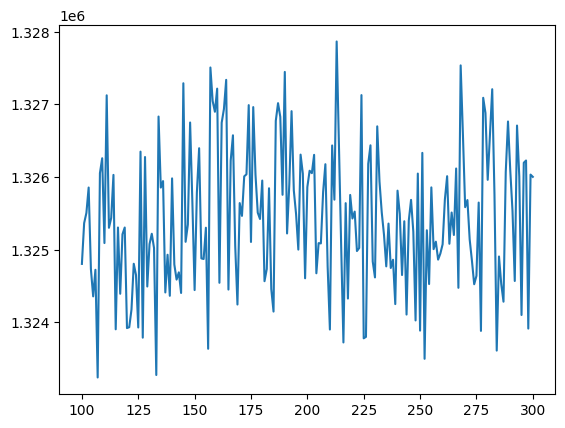

In [20]:
plt.plot(x,y_tot)

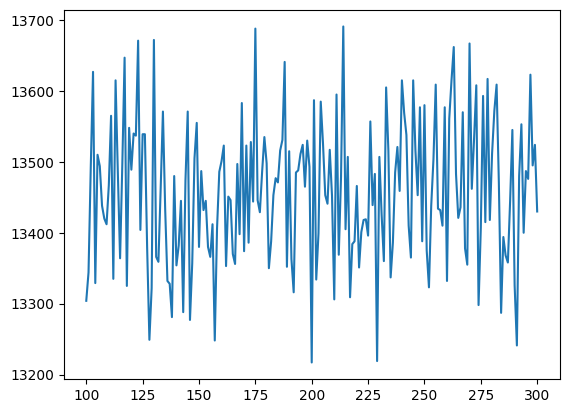

: 

In [21]:
plt.plot(x,y)